Importing Librarires to Scrape Data from Google play and for other operations

In [1]:
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np

We are using Adobe Photoshop as our app for Analysis

In [2]:
result, continuation_token = reviews(
    'com.adobe.psmobile',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=500, # defaults to 100
    filter_score_with=None # defaults to None(means all score)
)

result, _ = reviews(
    'com.adobe.psmobile',
    continuation_token=continuation_token # defaults to None(load from the beginning)
)

Scraped the result and putting it into a DataFrame

In [3]:
scrapeddata = pd.DataFrame(np.array(result), columns = ['review'])
scrapeddata = scrapeddata.join(pd.DataFrame(scrapeddata.pop('review').tolist()))

In [4]:
scrapeddata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,dc657a06-58e1-48b6-8e2c-730087082bca,Kakumba Kenny,https://play-lh.googleusercontent.com/a/AItbvm...,It is good for editing text,5,0,None,2022-08-21 00:30:06,None,NaT
1,8618b508-fdc7-4922-9f9c-6592a81f22a2,dhurvey Dhurve,https://play-lh.googleusercontent.com/a-/AFdZu...,Wow,4,0,None,2022-08-20 23:24:03,Hi there! We're glad to hear you like the app....,2022-08-25 02:59:31
2,43be1158-3d57-440d-a187-b95e0c17a164,Alok Bisoi,https://play-lh.googleusercontent.com/a-/AFdZu...,Good,4,0,8.3.979,2022-08-20 22:42:48,Hi there! We're glad to hear you like the app....,2022-08-25 02:59:37
3,304e7019-737c-4351-b8af-64b69049846c,Krishna Jaishwal,https://play-lh.googleusercontent.com/a/AItbvm...,Nice,5,0,None,2022-08-20 22:15:45,None,NaT
4,8c9bef14-d92d-49f3-9ba2-b07d935d4f37,moto g3m,https://play-lh.googleusercontent.com/a-/AFdZu...,Nice app.,2,0,None,2022-08-20 22:00:33,Hi there! We're glad to hear you like the app....,2022-08-24 00:40:08


In [5]:
scrapeddata['score'].mean()

3.936

In [6]:
scrapeddata['reviewCreatedVersion'].value_counts()

8.3.979    282
8.3.977     19
8.2.970      7
8.1.958      6
8.0.929      4
8.1.952      2
6.9.747      1
8.4.984      1
6.4.597      1
8.3.974      1
5.0.508      1
6.8.603      1
6.0.590      1
5.1.524      1
7.2.785      1
Name: reviewCreatedVersion, dtype: int64

In [7]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")


All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at siebert/sentiment-roberta-large-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [8]:
print(sentiment_analysis("I hate this!"))

[{'label': 'NEGATIVE', 'score': 0.9994561076164246}]


In [9]:
scrapeddata.dtypes

reviewId                        object
userName                        object
userImage                       object
content                         object
score                            int64
thumbsUpCount                    int64
reviewCreatedVersion            object
at                      datetime64[ns]
replyContent                    object
repliedAt               datetime64[ns]
dtype: object

In [10]:
scrapeddata['content'] = scrapeddata['content'].astype('str')

In [11]:
scrapeddata['result'] = scrapeddata['content'].apply(lambda x: sentiment_analysis(x))

In [12]:
scrapeddata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,result
0,dc657a06-58e1-48b6-8e2c-730087082bca,Kakumba Kenny,https://play-lh.googleusercontent.com/a/AItbvm...,It is good for editing text,5,0,None,2022-08-21 00:30:06,None,NaT,"[{'label': 'POSITIVE', 'score': 0.996535539627..."
1,8618b508-fdc7-4922-9f9c-6592a81f22a2,dhurvey Dhurve,https://play-lh.googleusercontent.com/a-/AFdZu...,Wow,4,0,None,2022-08-20 23:24:03,Hi there! We're glad to hear you like the app....,2022-08-25 02:59:31,"[{'label': 'POSITIVE', 'score': 0.996380031108..."
2,43be1158-3d57-440d-a187-b95e0c17a164,Alok Bisoi,https://play-lh.googleusercontent.com/a-/AFdZu...,Good,4,0,8.3.979,2022-08-20 22:42:48,Hi there! We're glad to hear you like the app....,2022-08-25 02:59:37,"[{'label': 'POSITIVE', 'score': 0.998415231704..."
3,304e7019-737c-4351-b8af-64b69049846c,Krishna Jaishwal,https://play-lh.googleusercontent.com/a/AItbvm...,Nice,5,0,None,2022-08-20 22:15:45,None,NaT,"[{'label': 'POSITIVE', 'score': 0.997769474983..."
4,8c9bef14-d92d-49f3-9ba2-b07d935d4f37,moto g3m,https://play-lh.googleusercontent.com/a-/AFdZu...,Nice app.,2,0,None,2022-08-20 22:00:33,Hi there! We're glad to hear you like the app....,2022-08-24 00:40:08,"[{'label': 'POSITIVE', 'score': 0.998672842979..."


In [13]:
scrapeddata.shape

(500, 11)

In [14]:
x = sentiment_analysis("I love this!")

In [15]:
x[0]['score']

0.9988656044006348

Making two more columns to distinguish the sentiment(Positive/Negative) and the score(i.e the percentage) 

In [16]:
scrapeddata['sentiment'] = scrapeddata['result'].apply(lambda x: (x[0]['label']))
scrapeddata['score'] = scrapeddata['result'].apply(lambda x: (x[0]['score']))


In [17]:
scrapeddata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,result,sentiment
0,dc657a06-58e1-48b6-8e2c-730087082bca,Kakumba Kenny,https://play-lh.googleusercontent.com/a/AItbvm...,It is good for editing text,0.996536,0,None,2022-08-21 00:30:06,None,NaT,"[{'label': 'POSITIVE', 'score': 0.996535539627...",POSITIVE
1,8618b508-fdc7-4922-9f9c-6592a81f22a2,dhurvey Dhurve,https://play-lh.googleusercontent.com/a-/AFdZu...,Wow,0.996380,0,None,2022-08-20 23:24:03,Hi there! We're glad to hear you like the app....,2022-08-25 02:59:31,"[{'label': 'POSITIVE', 'score': 0.996380031108...",POSITIVE
2,43be1158-3d57-440d-a187-b95e0c17a164,Alok Bisoi,https://play-lh.googleusercontent.com/a-/AFdZu...,Good,0.998415,0,8.3.979,2022-08-20 22:42:48,Hi there! We're glad to hear you like the app....,2022-08-25 02:59:37,"[{'label': 'POSITIVE', 'score': 0.998415231704...",POSITIVE
3,304e7019-737c-4351-b8af-64b69049846c,Krishna Jaishwal,https://play-lh.googleusercontent.com/a/AItbvm...,Nice,0.997769,0,None,2022-08-20 22:15:45,None,NaT,"[{'label': 'POSITIVE', 'score': 0.997769474983...",POSITIVE
4,8c9bef14-d92d-49f3-9ba2-b07d935d4f37,moto g3m,https://play-lh.googleusercontent.com/a-/AFdZu...,Nice app.,0.998673,0,None,2022-08-20 22:00:33,Hi there! We're glad to hear you like the app....,2022-08-24 00:40:08,"[{'label': 'POSITIVE', 'score': 0.998672842979...",POSITIVE


In [18]:
scrapeddata['sentiment'].value_counts(normalize=True)

POSITIVE    0.774
NEGATIVE    0.226
Name: sentiment, dtype: float64

In [19]:
scrapeddata['score'].mean()

0.9913433235883713

Importing libraries to plot the diagram for better visulaization

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

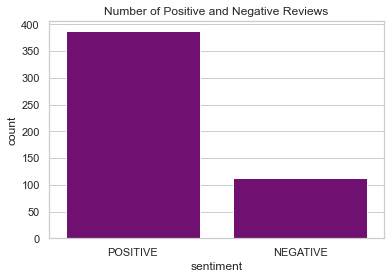

In [21]:
sns.set(style="whitegrid")
fig = sns.countplot(x=scrapeddata['sentiment'], color='purple')
plt.title('Number of Positive and Negative Reviews')
plt.show()

Final Result

In [22]:
scrapeddata['sentiment'].value_counts()

POSITIVE    387
NEGATIVE    113
Name: sentiment, dtype: int64

We can see from the above output the number of positive and negative reviews